ANALISIS PREDICTIVO 

¿Es posible predecir si un accidente de tránsito tendrá muertes, con base en las características registradas (tipo de accidente, número de vehículos, lesiones, etc.)? Además, ¿cuáles son las variables que más contribuyen a esta predicción?

In [1]:
#IMPORTAR LIBRERIAS
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#CARGUE DE DATOS
df = pd.read_csv('ACCIDENTESVIALES_3.csv', encoding='latin-1')
df.head()

,Fecha_Ocurrencia,Codigo_Accidente,Direccion,Tipo_via,Barrio,Vehiculos Involucrados,Heridos,Tipo_accidente,Muertes SI/NO,# Muertes,Clase de Accidente,Unnamed: 11
0,01/03/2024,A001602262,CALLE 14A CARRERA 34 BACHUE,SECUNDARIA,BACHUE,2,2,HERIDOS,0,0,CHOQUE,NaN
1,01/06/2024,A001602263,CALLE 14 CARRERA 28 SAN JOSÃ,SECUNDARIA,SAN JOSÃ,2,3,HERIDOS,0,0,CHOQUE,NaN
2,01/09/2024,A001602264,KILOMETRO 7+800 MTS,PRINCIPAL,No registra,1,1,HERIDOS,0,0,CHOQUE,NaN
3,01/12/2024,A001602265,AVENIDA 23 N. 24 - 07 LA TIZA,PRINCIPAL,LA TIZA,2,2,HERIDOS,0,0,CHOQUE,NaN
4,01/12/2024,A001602266,KILOMETRO 3+500 MTS VIA CHICHIMENE ESTACION AC...,PRINCIPAL,No registra,2,1,HERIDOS,0,0,CHOQUE,NaN


In [3]:
#REVISAR ESTRUCTURA DATA SET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Fecha_Ocurrencia        512 non-null    object 
 1   Codigo_Accidente        512 non-null    object 
 2   Direccion               512 non-null    object 
 3   Tipo_via                512 non-null    object 
 4   Barrio                  512 non-null    object 
 5   Vehiculos Involucrados  512 non-null    int64  
 6   Heridos                 512 non-null    int64  
 7   Tipo_accidente          512 non-null    object 
 8   Muertes SI/NO           512 non-null    int64  
 9   # Muertes               512 non-null    int64  
 10  Clase de Accidente      512 non-null    object 
 11  Unnamed: 11             0 non-null      float64
dtypes: float64(1), int64(4), object(7)
memory usage: 48.1+ KB


In [4]:
#DESCRIPCIÓN GENERAL
df.describe(include='all')

,Fecha_Ocurrencia,Codigo_Accidente,Direccion,Tipo_via,Barrio,Vehiculos Involucrados,Heridos,Tipo_accidente,Muertes SI/NO,# Muertes,Clase de Accidente,Unnamed: 11
count,512,512,512,512,512,512.000000,512.000000,512,512.000000,512.000000,512,0.0
unique,412,509,503,2,52,NaN,NaN,3,NaN,NaN,4,NaN
top,12/14/2024,A001371905,CALLE 13 CARRERA 16 CENTRO,SECUNDARIA,No registra,NaN,NaN,HERIDOS,NaN,NaN,CHOQUE,NaN
freq,3,2,2,341,115,NaN,NaN,412,NaN,NaN,450,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.865234,1.298828,NaN,0.080078,0.095703,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,0.471707,0.914419,NaN,0.271680,0.354757,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,0.000000,0.000000,NaN,NaN


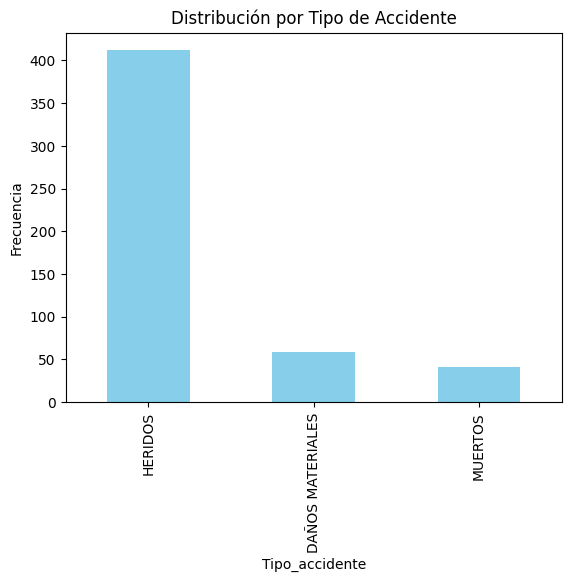

In [ ]:
# GRAFICO 1
# DISTRIBUCIÓN TIPO DE ACCIDENTE
df['Tipo_accidente'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución por Tipo de Accidente')
plt.xlabel('Tipo_accidente')
plt.ylabel('Frecuencia')
plt.show()

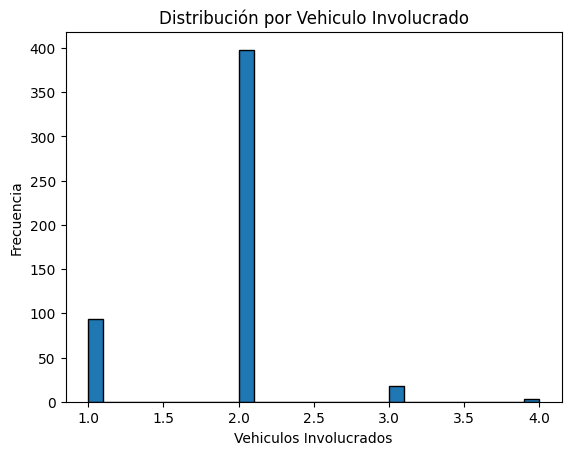

In [6]:
#GRAFICO 2
# DISTRIBUCIÓN POR VEHÍCULO INVOLUCRADO

df['Vehiculos Involucrados'].dropna().plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribución por Vehiculo Involucrado')
plt.xlabel('Vehiculos Involucrados')
plt.ylabel('Frecuencia')
plt.show()

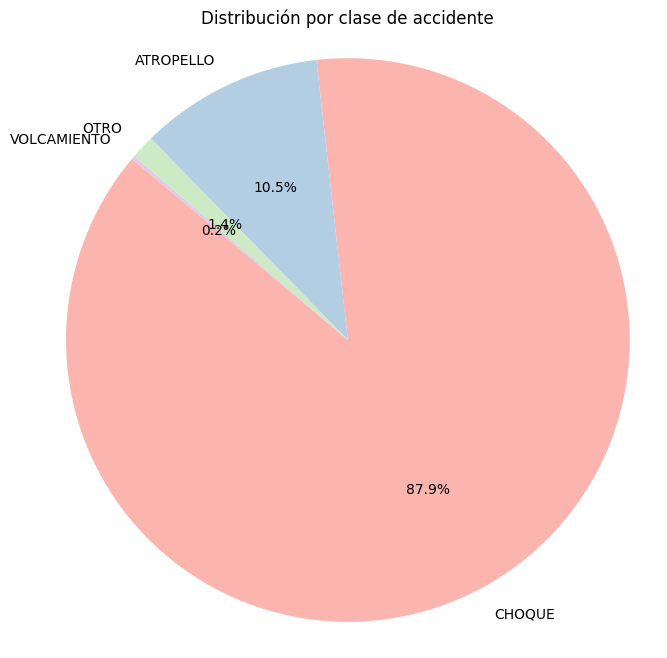

In [ ]:
#GRAFICO 3
#DISTRIBUCIÓN POR CLASE DE ACCIDENTE
clase_accidente = df['Clase de Accidente'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(clase_accidente,
        labels=clase_accidente.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Pastel1.colors)
plt.title('Distribución por clase de accidente')
plt.axis('equal')  # Para que el gráfico sea circular
plt.show()

EVALUACIÓN PREDICTIVA ANTES Y DESPUÉS DE LA LIMPIEZA

In [ ]:
#REVISIÓN DE DATOS
print(df['Muertes SI/NO'].value_counts())


Muertes SI/NO
0    471
1     41
Name: count, dtype: int64


In [ ]:
#CREAR VARIABLE OBJETIVO
df["Muertes_binaria"] = (df["Muertes SI/NO"] > 0).astype(int)